In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 환경 설정
matplotlib.rcParams['font.family']='Malgun Gothic' # 제어판 글꼴 속성
matplotlib.rcParams['axes.unicode_minus'] = False # 유니코드를 적용해라

In [2]:
url = 'http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
response = REQ.urlopen(url)
soup = BeautifulSoup(response, 'html.parser')

In [3]:
wData=[]
for location in soup.select('location'):
    for n in location.select('data'):
        wData.append({'도시':location.city.string, 
                      '날짜':n.tmef.string, 
                      '날씨':n.wf.string, 
                      '최고':int(n.tmx.string),
                      '최저':int(n.tmn.string)})

In [4]:
df = pd.DataFrame(wData)
df.head()

,날씨,날짜,도시,최고,최저
0,구름많음,2019-01-25 00:00,서울,3,-5
1,구름많음,2019-01-25 12:00,서울,3,-5
2,구름조금,2019-01-26 00:00,서울,3,-7
3,구름조금,2019-01-26 12:00,서울,3,-7
4,구름조금,2019-01-27 00:00,서울,3,-6


In [6]:
# 1번
g = df.groupby('도시') # grade로 뭉쳐놓았따. 
g.mean()

,최고,최저
도시,,
가평,3.923077,-9.846154
강화,3.307692,-6.000000
고양,4.076923,-5.846154
과천,3.461538,-5.461538
광명,4.076923,-3.538462
광주,4.076923,-7.230769
구리,3.923077,-5.461538
군포,4.076923,-4.461538
김포,3.076923,-5.538462


In [7]:
# 2번
name = input('도시 이름')
df[df['도시']==name][['날짜','날씨','최고','최저']].set_index('날짜')

도시 이름서울


,날씨,최고,최저
날짜,,,
2019-01-25 00:00,구름많음,3,-5
2019-01-25 12:00,구름많음,3,-5
2019-01-26 00:00,구름조금,3,-7
2019-01-26 12:00,구름조금,3,-7
2019-01-27 00:00,구름조금,3,-6
2019-01-27 12:00,구름조금,3,-6
2019-01-28 00:00,구름조금,4,-4
2019-01-28 12:00,구름조금,4,-4
2019-01-29 00:00,구름조금,4,-4


In [8]:
# 3번 
mx = df['최고'].max()
df[ df['최고']==mx ][['도시','날짜','최고']]

,도시,날짜,최고
389,의왕,2019-02-01 00:00,8


In [9]:
# 4번
df[df['날씨']=='구름많음'][['도시', '날짜', '날씨']]

,도시,날짜,날씨
0,서울,2019-01-25 00:00,구름많음
1,서울,2019-01-25 12:00,구름많음
13,인천,2019-01-25 00:00,구름많음
14,인천,2019-01-25 12:00,구름많음
26,수원,2019-01-25 00:00,구름많음
27,수원,2019-01-25 12:00,구름많음
39,파주,2019-01-25 00:00,구름많음
40,파주,2019-01-25 12:00,구름많음
52,이천,2019-01-25 00:00,구름많음
53,이천,2019-01-25 12:00,구름많음


In [44]:
# 5. 인천지역의 날씨데이터를 출력하시요 단 느낌 컬럼을 추가하고 최저기온이
#-5도 이하면: 매우추워요 // -4~-2 면: 추워요 // -1도이상이면: 조금추워요 로 같이 표시하시요
df5 = df[ df['도시']=='인천' ]
def feel( n ):
    if n <= -5:
        return '매우 추워요'
    elif n >= -4 and n <= -2:
        return '추워요'
    else:
        return '조금 추워요'
df5['느낌'] = df5['최저'].apply( feel )
df5

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,날씨,날짜,도시,최고,최저,느낌
13,구름많음,2019-01-25 00:00,인천,2,-4,추워요
14,구름많음,2019-01-25 12:00,인천,2,-4,추워요
15,구름조금,2019-01-26 00:00,인천,2,-6,매우 추워요
16,구름조금,2019-01-26 12:00,인천,2,-6,매우 추워요
17,구름조금,2019-01-27 00:00,인천,2,-5,매우 추워요
18,구름조금,2019-01-27 12:00,인천,2,-5,매우 추워요
19,구름조금,2019-01-28 00:00,인천,4,-2,추워요
20,구름조금,2019-01-28 12:00,인천,4,-2,추워요
21,구름조금,2019-01-29 00:00,인천,3,-3,추워요
22,구름조금,2019-01-29 12:00,인천,3,-3,추워요


In [7]:
df['날씨']

0      구름많음
1      구름많음
2      구름조금
3      구름조금
4      구름조금
5      구름조금
6      구름조금
7      구름조금
8      구름조금
9      구름조금
10     구름조금
11     구름조금
12     구름조금
13     구름많음
14     구름많음
15     구름조금
16     구름조금
17     구름조금
18     구름조금
19     구름조금
20     구름조금
21     구름조금
22     구름조금
23     구름조금
24     구름조금
25     구름조금
26     구름많음
27     구름많음
28     구름조금
29     구름조금
       ... 
425    구름조금
426    구름조금
427    구름조금
428    구름조금
429    구름많음
430    구름많음
431    구름조금
432    구름조금
433    구름조금
434    구름조금
435    구름조금
436    구름조금
437    구름조금
438    구름조금
439    구름조금
440    구름조금
441    구름조금
442    구름많음
443    구름많음
444    구름조금
445    구름조금
446    구름조금
447    구름조금
448    구름조금
449    구름조금
450    구름조금
451    구름조금
452    구름조금
453    구름조금
454    구름조금
Name: 날씨, Length: 455, dtype: object

In [19]:
def fn(v):
    print("v=",v)
    return v

In [21]:
# 6. 도시와 날짜를 인덱스로 피벗테이블로 출력하시요
df6 = df.pivot_table( index=['도시', '날짜'],
                     values=['날씨','최고','최저'],
         aggfunc=lambda x: x ) #문자열데이터가있는경우
df6

날씨  최고  최저
도시 날짜                            
가평 2019-01-25 00:00  구름많음   4 -11
   2019-01-25 12:00  구름많음   4 -11
   2019-01-26 00:00  구름조금   3 -13
   2019-01-26 12:00  구름조금   3 -13
   2019-01-27 00:00  구름조금   4 -13
   2019-01-27 12:00  구름조금   4 -13
   2019-01-28 00:00  구름조금   4  -5
   2019-01-28 12:00  구름조금   4  -5
   2019-01-29 00:00  구름조금   4 -11
   2019-01-29 12:00  구름조금   4 -11
   2019-01-30 00:00  구름조금   5  -8
   2019-01-31 00:00  구름조금   6  -5
   2019-02-01 00:00  구름조금   2  -9
강화 2019-01-25 00:00  구름많음   3  -7
   2019-01-25 12:00  구름많음   3  -7
   2019-01-26 00:00  구름조금   1  -8
   2019-01-26 12:00  구름조금   1  -8
   2019-01-27 00:00  구름조금   3  -8
   2019-01-27 12:00  구름조금   3  -8
   2019-01-28 00:00  구름조금   4  -4
   2019-01-28 12:00  구름조금   4  -4
   2019-01-29 00:00  구름조금   3  -7
   2019-01-29 12:00  구름조금   3  -7
   2019-01-30 00:00  구름조금   5  -4
   2019-01-31 00:00  구름조금   6  -3
   2019-02-01 00:00  구름조금   4  -3
고양 2019-01-25 00:00  구름많음   4  -7
   2019-01-25 12:00  구름많음   4  -7
   2019-01-26 00:00  구름조금   2  -8
   2019-01-26 12:00  구름조금   2  -8
...                   ...  ..  ..
포천 2019-01-29 12:00  구름조금   4 -10
   2019-01-30 00:00  구름조금   5  -6
   2019-01-31 00:00  구름조금   6  -4
   2019-02-01 00:00  구름조금   3  -6
하남 2019-01-25 00:00  구름많음   4  -7
   2019-01-25 12:00  구름많음   4  -7
   2019-01-26 00:00  구름조금   2  -9
   2019-01-26 12:00  구름조금   2  -9
   2019-01-27 00:00  구름조금   4  -9
   2019-01-27 12:00  구름조금   4  -9
   2019-01-28 00:00  구름조금   3  -4
   2019-01-28 12:00  구름조금   3  -4
   2019-01-29 00:00  구름조금   4  -7
   2019-01-29 12:00  구름조금   4  -7
   2019-01-30 00:00  구름조금   5  -4
   2019-01-31 00:00  구름조금   6  -3
   2019-02-01 00:00  구름조금   3  -3
화성 2019-01-25 00:00  구름많음   3  -6
   2019-01-25 12:00  구름많음   3  -6
   2019-01-26 00:00  구름조금   1  -8
   2019-01-26 12:00  구름조금   1  -8
   2019-01-27 00:00  구름조금   4  -7
   2019-01-27 12:00  구름조금   4  -7
   2019-01-28 00:00  구름조금   4  -2
   2019-01-28 12:00  구름조금   4  -2
   2019-01-29 00:00  구름조금   3  -6
   2019-01-29 12:00  구름조금   3  -6
   2019-01-30 00:00  구름조금   6  -5
   2019-01-31 00:00  구름조금   6  -2
   2019-02-01 00:00  구름조금   2  -4

[455 rows x 3 columns]

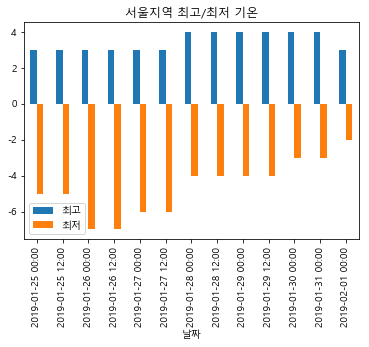

In [46]:
# 7. 서울시역의 날짜별 최고 최저기온을 바차트로 그리시요
g7 = df[ df['도시'] == '서울' ].set_index('날짜')
g7[['최고', '최저']].plot(kind='bar', title='서울지역 최고/최저 기온')
plt.show()

In [47]:
# 8. 서울지역  -5도 이하인데이터를 구하시요
df[(df['도시']=='서울')  & (df['최저']<-5)]

,날씨,날짜,도시,최고,최저,느낌
2,구름조금,2019-01-26 00:00,서울,3,-7,매우 추워요
3,구름조금,2019-01-26 12:00,서울,3,-7,매우 추워요
4,구름조금,2019-01-27 00:00,서울,3,-6,매우 추워요
5,구름조금,2019-01-27 12:00,서울,3,-6,매우 추워요


In [57]:
# 9. 수원지역 -5도 이하인 데이터의 비율을 구하시요. 비율??
# idx, v = df[df['도시']=='수원'].shape
idx = len( df[df['도시']=='수원'] )
idx2, v2 = df[(df['도시'] == '수원') & (df['최저'] < -5)].shape
# 비율?
print('비율:',idx2/idx*100, '%')

비율: 0.43956043956043955 %


In [37]:
# 10. 최고기온과 최저기온의 차이가 가장높은 도시, 날짜, 최저 최고를 구하시요

df[(df['최고'] - df['최저']) == (df['최고'] - df['최저']).max()][['도시', '날짜', '최저', '최고']]

,도시,날짜,최저,최고
264,가평,2019-01-27 00:00,-13,4
265,가평,2019-01-27 12:00,-13,4
